# 🧹 Data Cleaning Notebook (Updated & Modularized)

This notebook filters, resizes, and moves images from class-based folders using helper functions.

In [1]:
import os
import sys
import matplotlib.pyplot as plt

# ensure utils module is in path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.preprocessing import clean_and_resize_images, split_train_val

In [2]:
# define paths
source_path = "../data/train_images"
output_path = "../data/train_images_cleaned"

In [3]:
# clean & resize
invalids = clean_and_resize_images(source_path, output_path)
print(f"✅ Done Cleaning. {len(invalids)} invalid images found.")

✅ Done Cleaning. 0 invalid images found.


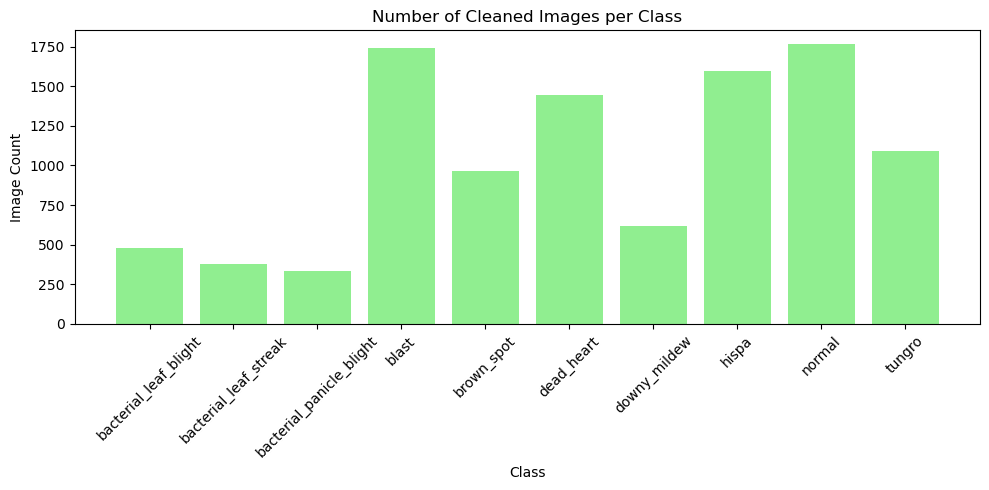

In [4]:
# visualize class distribution in cleaned folder
class_counts = {folder: len(os.listdir(os.path.join(output_path, folder))) 
                for folder in os.listdir(output_path)}

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='lightgreen')
plt.xticks(rotation=45)
plt.title("Number of Cleaned Images per Class")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()

In [5]:
# sSave invalid image paths
with open("../outputs/invalid_images_log.txt", "w") as f:
    for path in invalids:
        f.write(path + "\n")

In [6]:

# split train/val (80/20)
split_train_val(output_path, train_ratio=0.8)
print("✅ Done splitting train/val.")


✅ Done splitting train/val.
